
# Assignment 4: Diffusion 
For this assignment, you will be using colab. 
 
Please complete and submit this assignment by April 9, 11:59 PM. Download and submit 
the .ipynb file and share the notebook with the TA (swetha.sirnam@ucf.edu and 
swethacrcv@gmail.com) 

### Useful Resources: 
 
**PyTorch Colab Documentation:** 
https://pytorch.org/tutorials/beginner/colab.html 
 
**HuggingFace Sample Notebooks:** 
https://huggingface.co/docs/transformers/en/notebooks 
 
**Stable Diffusion v1.5 (SDv1.5)** 
Model Doc/Weights: https://huggingface.co/stable-diffusion-v1-5/stable-diffusion-v1-5
 
**Kandinsky** 
Model Doc: https://huggingface.co/docs/diffusers/en/using-diffusers/inpaint 
Weights: https://huggingface.co/kandinsky-community/kandinsky-2-2-decoder 
 
**ControlNet** 
Model Doc/Weights: https://huggingface.co/lllyasviel/sd-controlnet-canny 
 
### Tasks: 
1. Setup a Google Colab and load the above the models (SDv1.5, Kandinsky, 
ControlNet) onto GPU from huggingface and show memory usage for each 
model. [10 points] 
 
2. Text-to-Image Generation [20 points] 
a. Generate 10 sample images of your choice – Text-to-Image generation 
using stable diffusion and Kandinsky models and compare the generated 
images.  
3. Generate Images for Intersectional Biases [35 points] 
a. Generate images for at least 10 intersectional categories of your choice, 
with the focus to assess model bias 
i. SocialCounterfactuals paper[I] generates synthetic images for 
different races, gender and occupations. Explore other categories of 
your choice like Religion, Socio-economic status, location etc. Generate 
10 images spanning various intersectional biases. 
ii. List down the categories first before generating images and then show 
images for each of them. 
4. Human Redaction [ 35 points] 
a. Take 10 celebrity pictures that has face clearly visible in the image. 
Perform human redaction on these images by replacing the human with 
cartoon caricature. Use ControlNet to maintain the original silhouette.  
 
### References: 
I. Howard, Phillip, et al. "Socialcounterfactuals: Probing and mitigating intersectional social 
biases in vision-language models with counterfactual examples." Proceedings of the 
IEEE/CVF Conference on Computer Vision and Pattern Recognition. 2024 

In [15]:
# Install HuggingFace in system if not installed
%pip install python-dotenv
%pip install git+https://github.com/huggingface/transformers
%pip install --upgrade huggingface_hub
%pip install --upgrade diffusers transformers accelerate mediapy peft pytorch_fid
%pip install torch torchvision torchaudio
%pip install pillow
%pip install requests
%pip install matplotlib
%pip install pandas
%pip install numpy
%pip install tensorflow
%pip install datasets
%pip install evaluate
%pip install bert_score
%pip -q install bitsandbytes accelerate xformers einops
%pip install opencv-python

# For Conda Environments to install Flash-Attention
%conda install -c nvidia cuda-python
%pip install flash_attn



Note: you may need to restart the kernel to use updated packages.
  Cloning https://github.com/huggingface/transformers to /tmp/pip-req-build-9ywz7oys
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers /tmp/pip-req-build-9ywz7oys
  Resolved https://github.com/huggingface/transformers to commit c9302c09833d8a8a28263251d16fb19ff4c10d2f
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need 

In [1]:
# importing os module for environment variables
import os
# importing necessary functions from dotenv library
from dotenv import load_dotenv, dotenv_values 
# loading variables from .env file
load_dotenv() 


# Set model cache location 
import os
os.environ['HF_HOME'] = os.getenv("CACHE_LOCATION")
!export HF_HOME={os.getenv("CACHE_LOCATION")}


# Login to HuggingFace
# This code will save huggingface token to PC, but your PC first has to have github token stored in pc
!huggingface-cli login --token {os.getenv("HUGGINGFACE_TOKEN")} --add-to-git-credential

# Import packages
# Next import packages. These packages are already preinstalled in Google Colab
import torch # This is a package for providing tensor-computation and prebuilt deep neural networks
from PIL import Image # The Image module provides a class to represent a PIL Image. You can use this module to load images from files, create new images, and do some image editing
import requests # Module that allows you to do HTTP requests easily
import matplotlib.pyplot as plt # Module that allows visualizations for images, math,tensors, etc...
import pandas as pd, numpy as np # Package that provides fast, flexible and expressive data structures desgined for working with labeled and unlabeled data for data analysis
import tensorflow as tf # For high performance numerical computations using CPUs, GPUs and TPUs
import os # Module for using operating system dependent functionality
import urllib.request # Defines functions and classes for opening URLs
#from IPython.display import display, Markdown, HTML, clear_output
#import ipywidgets as widgets

import gc

Token is valid (permission: fineGrained).
The token `Desktop_PC_Ubuntu` has been saved to /mnt/Creative/SoftwareDevelopment/huggingface/cache/stored_tokens
Your token has been saved in your configured git credential helpers (store).
Your token has been saved to /mnt/Creative/SoftwareDevelopment/huggingface/cache/token
Login successful.
The current active token is: `Desktop_PC_Ubuntu`


2025-04-03 03:05:14.345093: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-03 03:05:14.351807: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743663914.359656   12244 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743663914.362005   12244 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1743663914.368212   12244 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [2]:
# Prints out the location that the models are downloaded to
print(os.getenv("CACHE_LOCATION"))

/mnt/Creative/SoftwareDevelopment/huggingface/cache/


## Import and Setup Stable Diffusion 1.5, Kandisnky and ControlNet

In [ ]:
# Import Stable Diffusion 1.5

from diffusers import DiffusionPipeline

diffusion_pipe = DiffusionPipeline.from_pretrained("stable-diffusion-v1-5/stable-diffusion-v1-5", device_map="balanced")

prompt = "The Darkness in my mind, 8k"
image = diffusion_pipe(prompt).images[0]



model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Taking `'Attention' object has no attribute 'key'` while using `accelerate.load_checkpoint_and_dispatch` to mean /mnt/Creative/SoftwareDevelopment/huggingface/cache/hub/models--stable-diffusion-v1-5--stable-diffusion-v1-5/snapshots/451f4fe16113bff5a5d2269ed5ad43b0592e9a14/vae was saved with deprecated attention block weight names. We will load it with the deprecated attention block names and convert them on the fly to the new attention block format. Please re-save the model after this conversion, so we don't have to do the on the fly renaming in the future. If the model is from a hub checkpoint, please also re-upload it or open a PR on the original repository.


  0%|          | 0/50 [00:00<?, ?it/s]

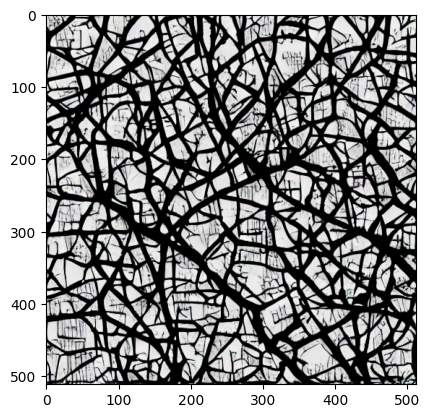

In [4]:
plt.imshow(image)

In [5]:
# Show GPU Usage:
!nvidia-smi

Thu Apr  3 02:59:07 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 570.124.06             Driver Version: 570.124.06     CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3090        Off |   00000000:01:00.0  On |                  N/A |
| 30%   32C    P8             45W /  350W |    2792MiB /  24576MiB |     42%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [7]:
# Delete model from memory
diffusion_pipe.reset_device_map()
diffusion_pipe.to('cpu')
del diffusion_pipe
gc.collect()
torch.cuda.empty_cache()

In [ ]:
# Import Kandinsky

from diffusers import AutoPipelineForInpainting
from diffusers.utils import load_image, make_image_grid

kandinsky_pipe= AutoPipelineForInpainting.from_pretrained(
    "kandinsky-community/kandinsky-2-2-decoder-inpaint", torch_dtype=torch.float16
).to(device="cuda:0")


Loading pipeline components...:   0%|          | 0/3 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [6]:
# Get VRAM Usage

!nvidia-smi

Thu Apr  3 03:13:20 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 570.124.06             Driver Version: 570.124.06     CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3090        Off |   00000000:01:00.0  On |                  N/A |
| 30%   33C    P5             46W /  350W |   10651MiB /  24576MiB |     24%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [7]:
# Load Base and Mask images

init_image = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/inpaint.png")
mask_image = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/inpaint_mask.png")

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

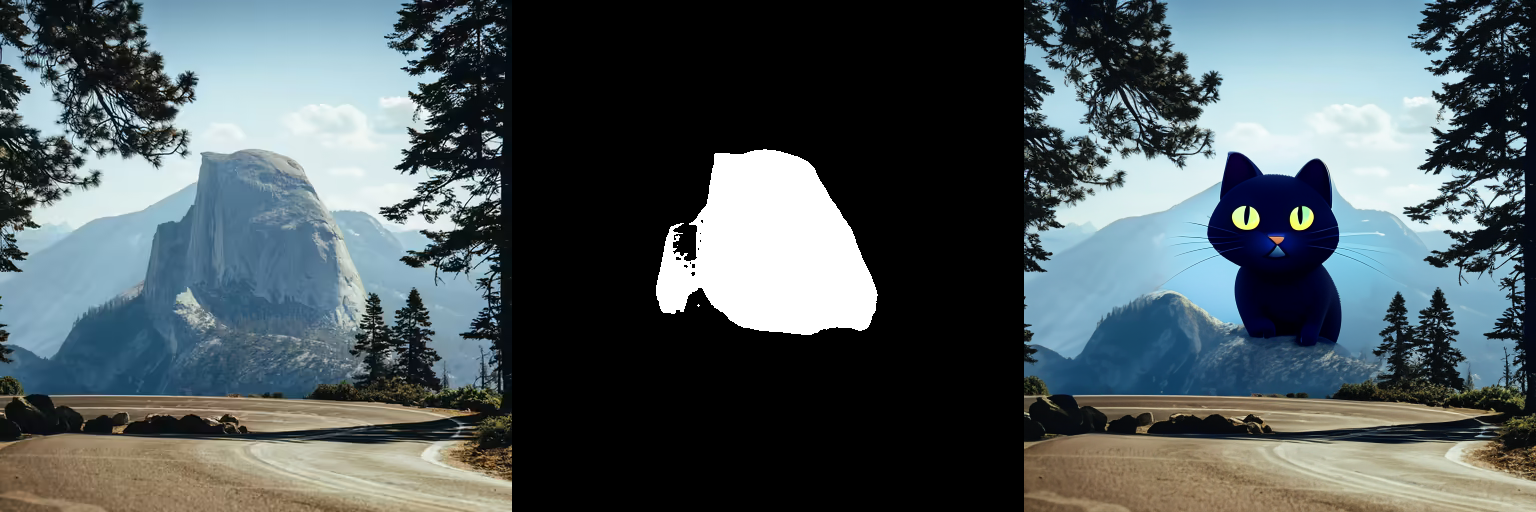

In [ ]:
prompt = "a black cat with glowing eyes, cute, adorable, disney, pixar, highly detailed, 8k"
negative_prompt = "bad anatomy, deformed, ugly, disfigured"
image = kandinsky_pipe(prompt=prompt, negative_prompt=negative_prompt, image=init_image, mask_image=mask_image).images[0]
make_image_grid([init_image, mask_image, image], rows=1, cols=3)

In [ ]:
# Delete model from memory

#kandinsky_pipeline.to('cpu')
del kandinsky_pipe
gc.collect()
torch.cuda.empty_cache()

In [13]:
# Import ControlNet

from diffusers import ControlNetModel, StableDiffusionControlNetPipeline

controlnet = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-canny")
controlnet_pipe = StableDiffusionControlNetPipeline.from_pretrained(
	"runwayml/stable-diffusion-v1-5", controlnet=controlnet, device_map="balanced"
)

diffusion_pytorch_model.safetensors:  28%|##7       | 398M/1.45G [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Taking `'Attention' object has no attribute 'key'` while using `accelerate.load_checkpoint_and_dispatch` to mean /mnt/Creative/SoftwareDevelopment/huggingface/cache/hub/models--runwayml--stable-diffusion-v1-5/snapshots/451f4fe16113bff5a5d2269ed5ad43b0592e9a14/vae was saved with deprecated attention block weight names. We will load it with the deprecated attention block names and convert them on the fly to the new attention block format. Please re-save the model after this conversion, so we don't have to do the on the fly renaming in the future. If the model is from a hub checkpoint, please also re-upload it or open a PR on the original repository.


In [14]:
# Get VRAM Usage

!nvidia-smi

Thu Apr  3 03:23:15 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 570.124.06             Driver Version: 570.124.06     CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3090        Off |   00000000:01:00.0  On |                  N/A |
| 30%   33C    P5             47W /  350W |    2941MiB /  24576MiB |     23%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [17]:
import cv2
from PIL import Image
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, UniPCMultistepScheduler
import torch
import numpy as np
from diffusers.utils import load_image

image = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/inpaint.png")
image = np.array(image)

low_threshold = 100
high_threshold = 200

image = cv2.Canny(image, low_threshold, high_threshold)
image = image[:, :, None]
image = np.concatenate([image, image, image], axis=2)
image = Image.fromarray(image)

controlnet = ControlNetModel.from_pretrained(
    "lllyasviel/sd-controlnet-canny", torch_dtype=torch.float16
)

pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=controlnet, safety_checker=None, torch_dtype=torch.float16
)

pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)

# Remove if you do not have xformers installed
# see https://huggingface.co/docs/diffusers/v0.13.0/en/optimization/xformers#installing-xformers
# for installation instructions
pipe.enable_xformers_memory_efficient_attention()

pipe.enable_model_cpu_offload()

image = pipe("bird", image, num_inference_steps=20).images[0]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.controlnet.pipeline_controlnet.StableDiffusionControlNetPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


  0%|          | 0/20 [00:00<?, ?it/s]

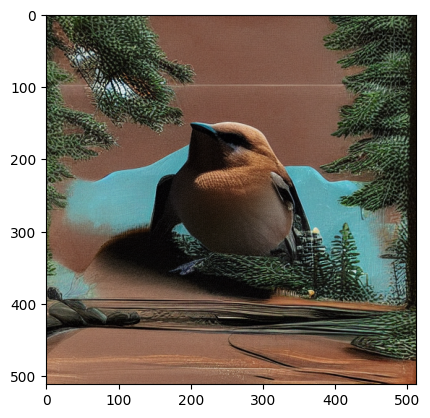

In [18]:
plt.imshow(image)